## Data understanding and Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class color:   
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
df= pd.read_csv('question_dataset.csv')
df.sort_values(by='age')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Cleaning data includes:
1. Dropping NA and NULLs, if any 
2. Dropping duplicates, found 21, business user confirmed that those can be dropped
3. Removing an extra dot from Job=admin, wasn't necessary maybe but it was hurting my eyes
4. Changing feature names to a more meaning name for easier understanding
5. pdays=0 where client was not previously contacted
6. Since 'basic.4y','basic.6y', 'basic.9y' fall in the 'basic' category, they are grouped together in "basic"

In [6]:
df=df.dropna()
df.shape

(41188, 21)

In [7]:
# show rows with ANY nulls:
df_nulls = df[df.isnull().apply(lambda x: max(x), axis=1)]
df_nulls.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [8]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [9]:
df=df.drop_duplicates(keep='last')
df.shape

(41176, 21)

In [10]:
df['job'] =df['job'].map(lambda x: x.rstrip('.'))

In [11]:
df.columns=['Age', 'Job Type', 'Marital Status', 'Education', 'Credit Defaulter', 'Housing Loan',
       'Personal Loan', 'Contact Type', 'Last Contact Month', 'Last Contact Day of Week', 'Last Contact Duration',
       'No. of Contacts', 'Days Contacted after Previous Campaign', 'No. of Contacts in Previous Campaign', 'Previous Campaign Outcome', 
       'Employment Var Rate', 'Consumer Price Index', 'Consumer Confidence Index','Euribor 3-mn Rate', 'No. of Employees','Subscribed']

In [12]:
df.head()

,Age,Job Type,Marital Status,Education,Credit Defaulter,Housing Loan,Personal Loan,Contact Type,Last Contact Month,Last Contact Day of Week,...,No. of Contacts,Days Contacted after Previous Campaign,No. of Contacts in Previous Campaign,Previous Campaign Outcome,Employment Var Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-mn Rate,No. of Employees,Subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
df.loc[df['Days Contacted after Previous Campaign'] ==999, 'Days Contacted after Previous Campaign'] = 0

In [14]:
df['Education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [15]:
#df['Education'] = np.where((df['Education']=='basic.4y') &(df['Education']=='basic.6y')&(df['Education']=='basic.9y'), 'basic', df['Education'])
df.loc[df['Education'] =='basic.4y', 'Education'] = 'basic'
df.loc[df['Education'] =='basic.6y', 'Education'] = 'basic'
df.loc[df['Education'] =='basic.9y', 'Education'] = 'basic'

In [16]:
df['Education'].unique()

array(['basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [17]:
df.head()

,Age,Job Type,Marital Status,Education,Credit Defaulter,Housing Loan,Personal Loan,Contact Type,Last Contact Month,Last Contact Day of Week,...,No. of Contacts,Days Contacted after Previous Campaign,No. of Contacts in Previous Campaign,Previous Campaign Outcome,Employment Var Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-mn Rate,No. of Employees,Subscribed
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Exploration and visualization

In [18]:
df.columns

Index(['Age', 'Job Type', 'Marital Status', 'Education', 'Credit Defaulter',
       'Housing Loan', 'Personal Loan', 'Contact Type', 'Last Contact Month',
       'Last Contact Day of Week', 'Last Contact Duration', 'No. of Contacts',
       'Days Contacted after Previous Campaign',
       'No. of Contacts in Previous Campaign', 'Previous Campaign Outcome',
       'Employment Var Rate', 'Consumer Price Index',
       'Consumer Confidence Index', 'Euribor 3-mn Rate', 'No. of Employees',
       'Subscribed'],
      dtype='object')

In [19]:
df.groupby('Subscribed').mean()

,Age,Last Contact Duration,No. of Contacts,Days Contacted after Previous Campaign,No. of Contacts in Previous Campaign,Employment Var Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-mn Rate,No. of Employees
Subscribed,,,,,,,,,,
no,39.910994,220.868079,2.633385,0.092892,0.132414,0.248885,93.603798,-40.593232,3.811482,5176.165690
yes,40.912266,553.256090,2.051951,1.232593,0.492779,-1.233089,93.354577,-39.791119,2.123362,5095.120069


In [20]:
df['Subscribed'].value_counts()

no     36537
yes     4639
Name: Subscribed, dtype: int64

**By looking at the count above, we see that "no" category is way more than "yes" category, so this data is biased. By researching further I found few techniques to balance the data:**
    <br>
    **1. Random Undersampling -** _In this method, the majority category, in this case 'no' category is randomly sampled to match the size of the minority 'yes' category. Remaining data of majority category is discarded._ 
    <br>
    **2. Random Oversampling -** _In this method, the minority category 'no' is randomly sampled with replacement to match the size of the majority 'no' category. Minority category entries will be repeated many times._<br>
    **3. SMOTE -** _This is an oversampling technique in which instead of randomly repeating minority 'yes' category, new entires are sythetically created maintaining the convexity of minority entry space. Minority category will again match the majority category samples._

**I did not apply any techniques to balance the data due to lack of knowledge, but this is something I would like to do next with this data**

### Data visualization of Categorical variables

Text(0, 0.5, 'Frequency')

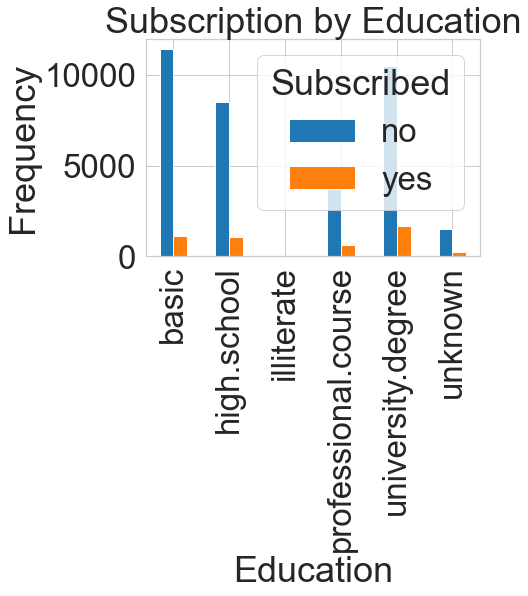

In [64]:
%matplotlib inline
plt.rc("font", size=20)
pd.crosstab(df['Education'],df.Subscribed).plot(kind='bar')
plt.title("Subscription by Education")
plt.xlabel('Education')
plt.ylabel('Frequency')

**Education seems to be a good predictor 

Text(0, 0.5, 'Frequency')

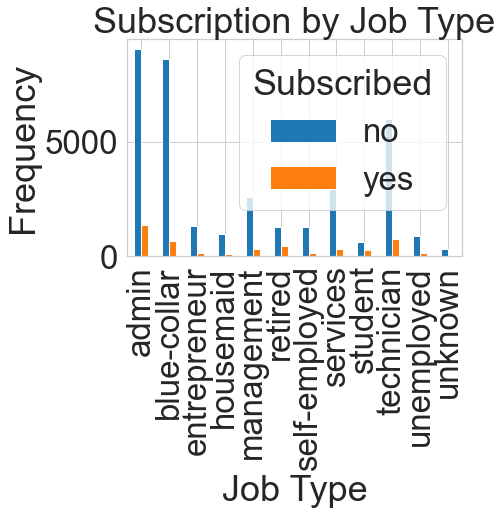

In [65]:
%matplotlib inline
plt.rc("font", size=20)
pd.crosstab(df['Job Type'],df.Subscribed).plot(kind='bar')
plt.title("Subscription by Job Type")
plt.xlabel('Job Type')
plt.ylabel('Frequency')

**Job Type seems to be a good predictor 

Text(0, 0.5, 'Frequency')

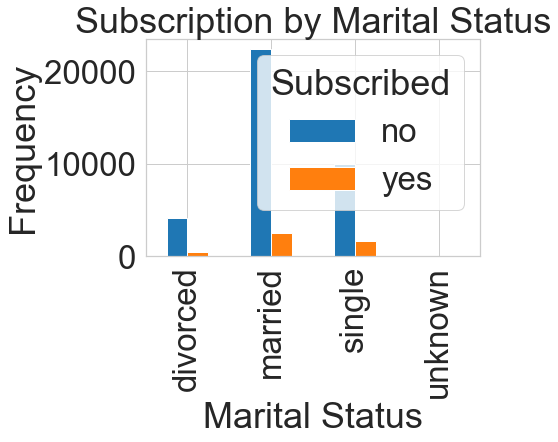

In [66]:
%matplotlib inline
plt.rc("font", size=20)
pd.crosstab(df['Marital Status'],df.Subscribed).plot(kind='bar')
plt.title("Subscription by Marital Status")
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

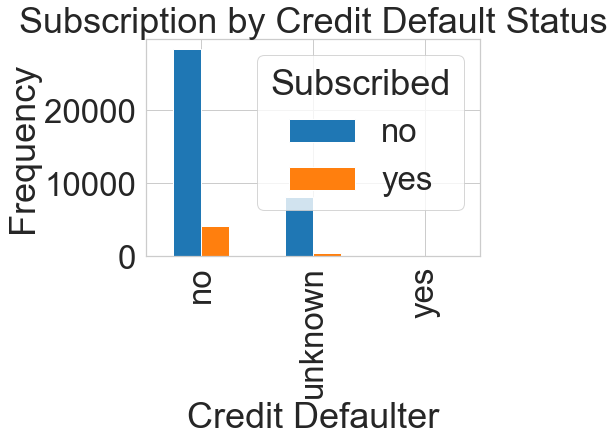

In [67]:
%matplotlib inline
plt.rc("font", size=20)
pd.crosstab(df['Credit Defaulter'],df.Subscribed).plot(kind='bar')
plt.title("Subscription by Credit Default Status")
plt.xlabel('Credit Defaulter')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

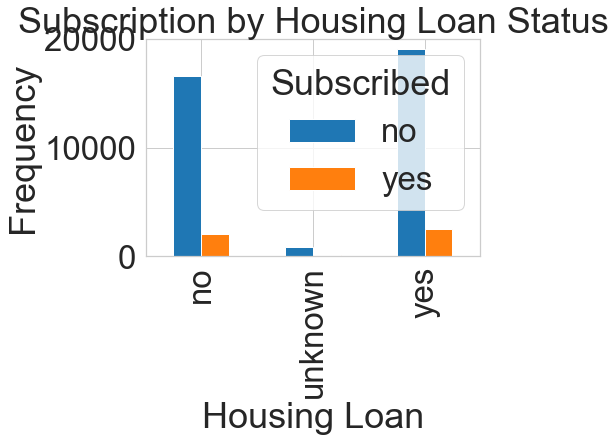

In [68]:
%matplotlib inline
plt.rc("font", size=20)
pd.crosstab(df['Housing Loan'],df.Subscribed).plot(kind='bar')
plt.title("Subscription by Housing Loan Status")
plt.xlabel('Housing Loan')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

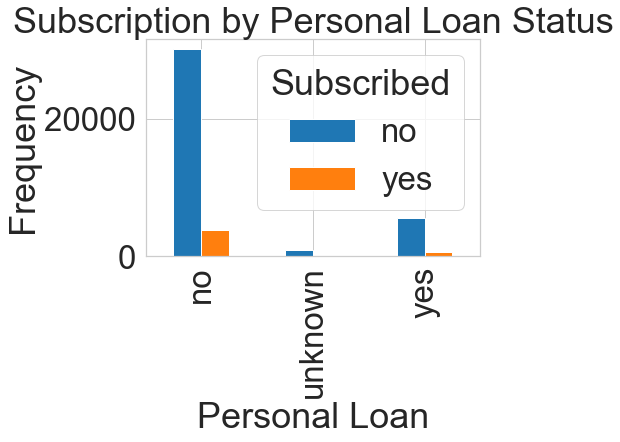

In [69]:
%matplotlib inline
plt.rc("font", size=20)
pd.crosstab(df['Personal Loan'],df.Subscribed).plot(kind='bar')
plt.title("Subscription by Personal Loan Status")
plt.xlabel('Personal Loan')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

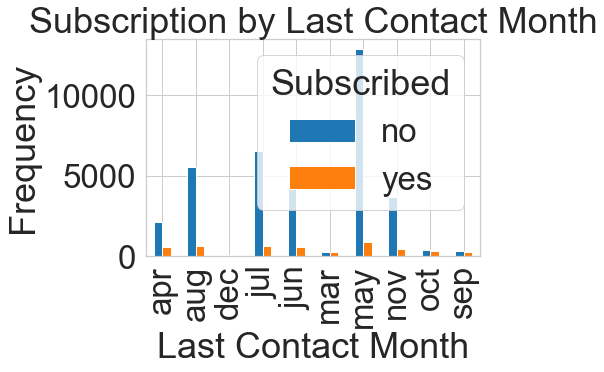

In [70]:
%matplotlib inline
plt.rc("font", size=20)
pd.crosstab(df['Last Contact Month'],df.Subscribed).plot(kind='bar')
plt.title("Subscription by Last Contact Month")
plt.xlabel('Last Contact Month')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

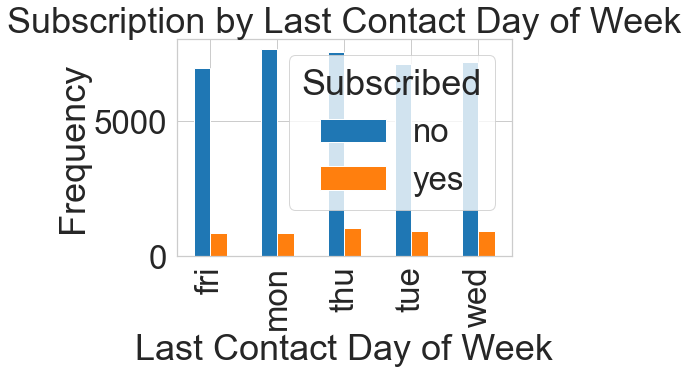

In [71]:
%matplotlib inline
plt.rc("font", size=20)
pd.crosstab(df['Last Contact Day of Week'],df.Subscribed).plot(kind='bar')
plt.title("Subscription by Last Contact Day of Week")
plt.xlabel('Last Contact Day of Week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

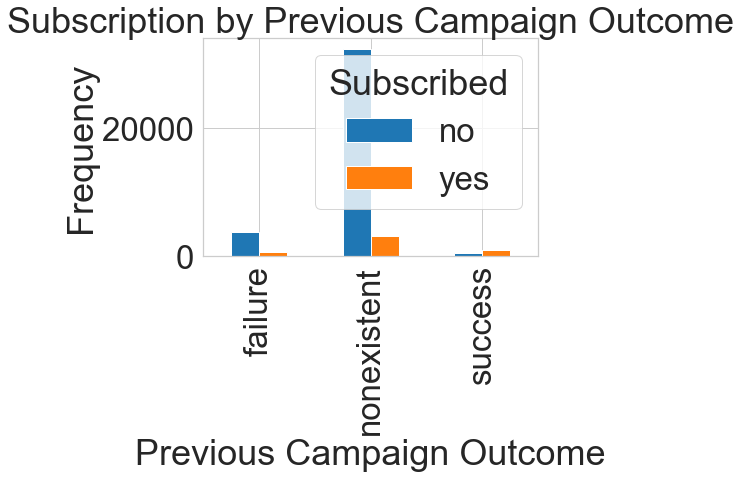

In [72]:
%matplotlib inline
plt.rc("font", size=20)
pd.crosstab(df['Previous Campaign Outcome'],df.Subscribed).plot(kind='bar')
plt.title("Subscription by Previous Campaign Outcome")
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Frequency')

### Data Visualization of numerical variables

Text(0.5, 0.98, 'Subscription by Age')

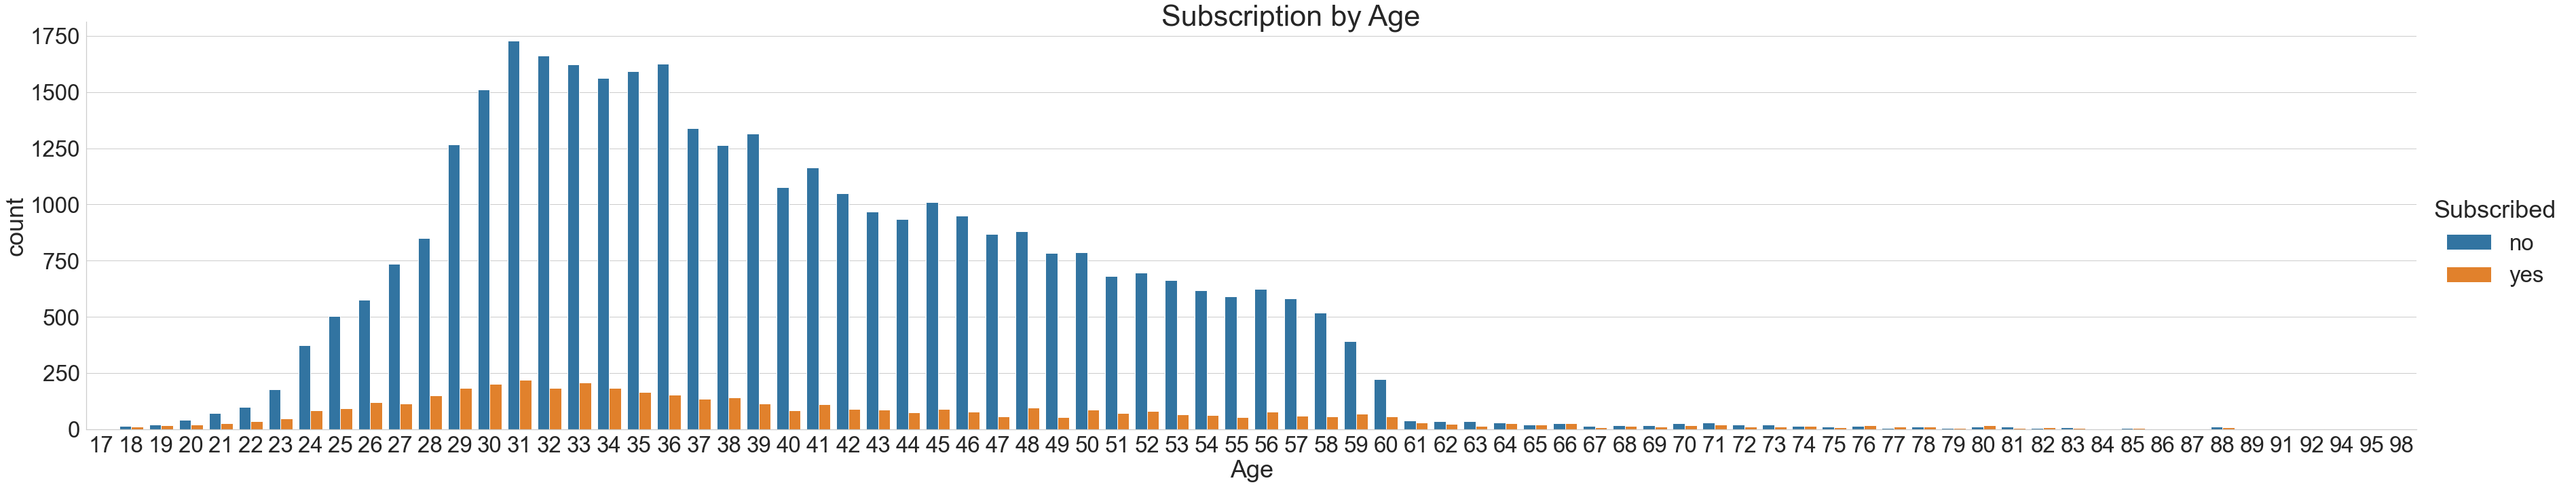

In [73]:
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
ax=sns.catplot(data=df, x='Age', kind = 'count',hue='Subscribed', height=10, aspect=5)
ax.fig.suptitle('Subscription by Age')

Text(0.5, 0.98, 'Subscription by No. of Contacts')

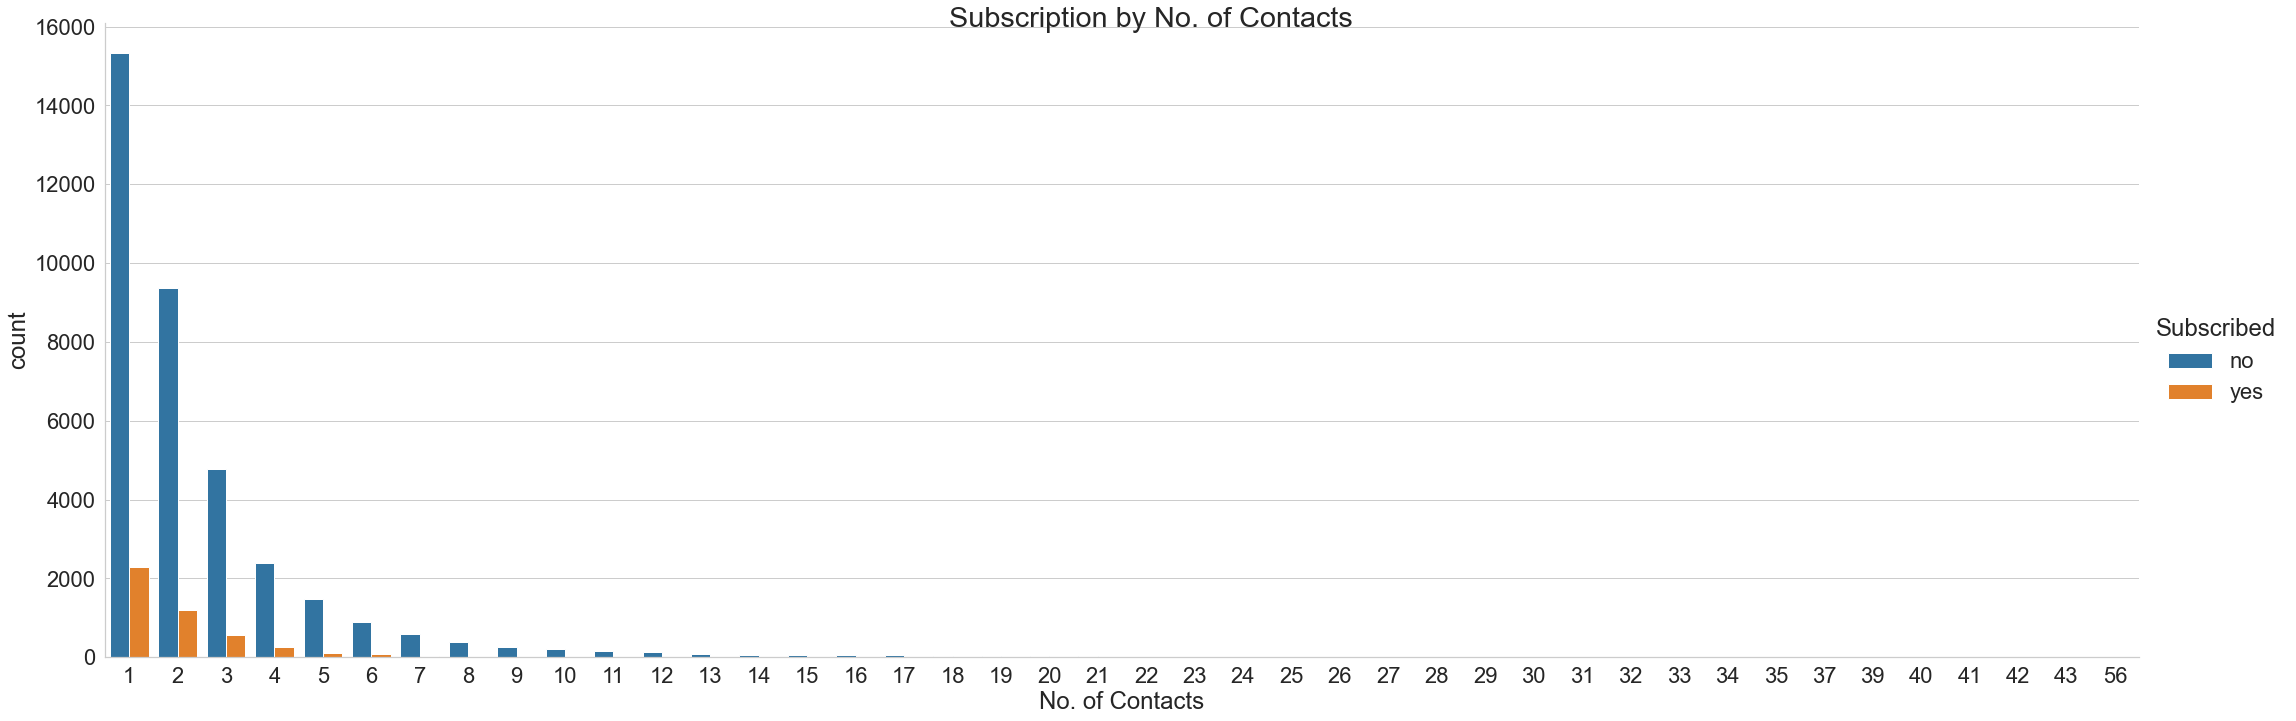

In [74]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
ax=sns.catplot(data=df, x='No. of Contacts', kind = 'count',hue='Subscribed', height=10, aspect=3)
ax.fig.suptitle('Subscription by No. of Contacts')

Text(0.5, 0.98, 'Subscription by No. of Contacts in Previous Campaign')

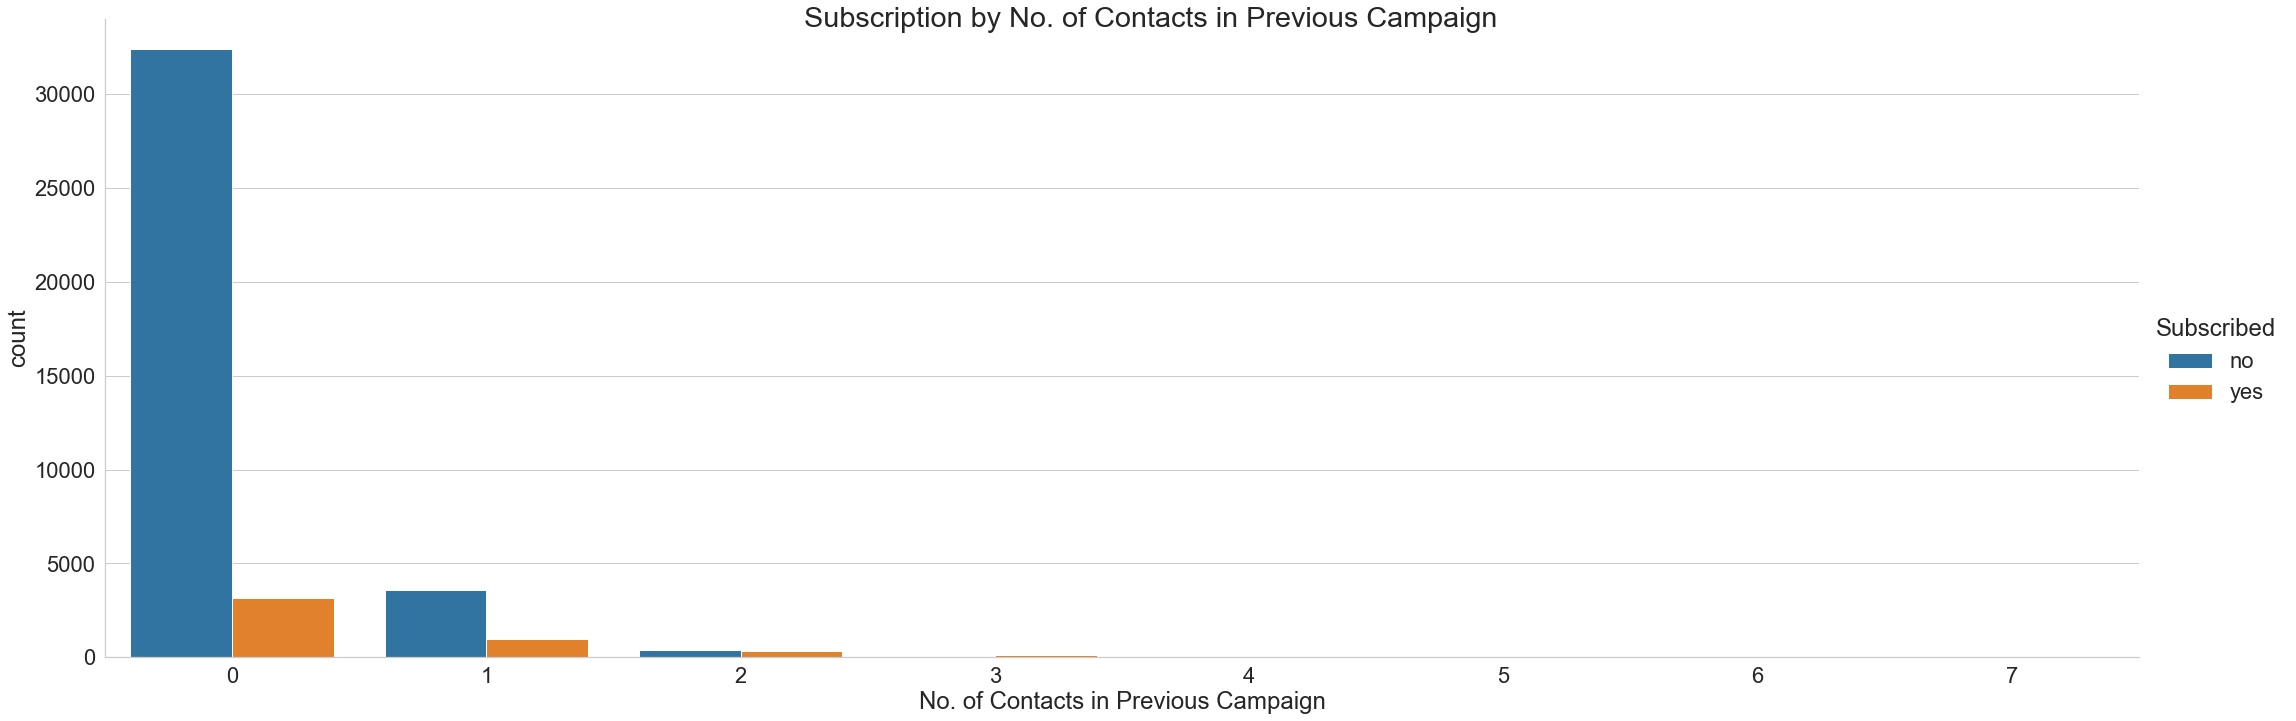

In [75]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
ax=sns.catplot(data=df, x='No. of Contacts in Previous Campaign', kind = 'count',hue='Subscribed', height=10, aspect=3)
ax.fig.suptitle('Subscription by No. of Contacts in Previous Campaign')

Text(0.5, 0.98, 'Subscription by Days Contacted after Previous Campaign')

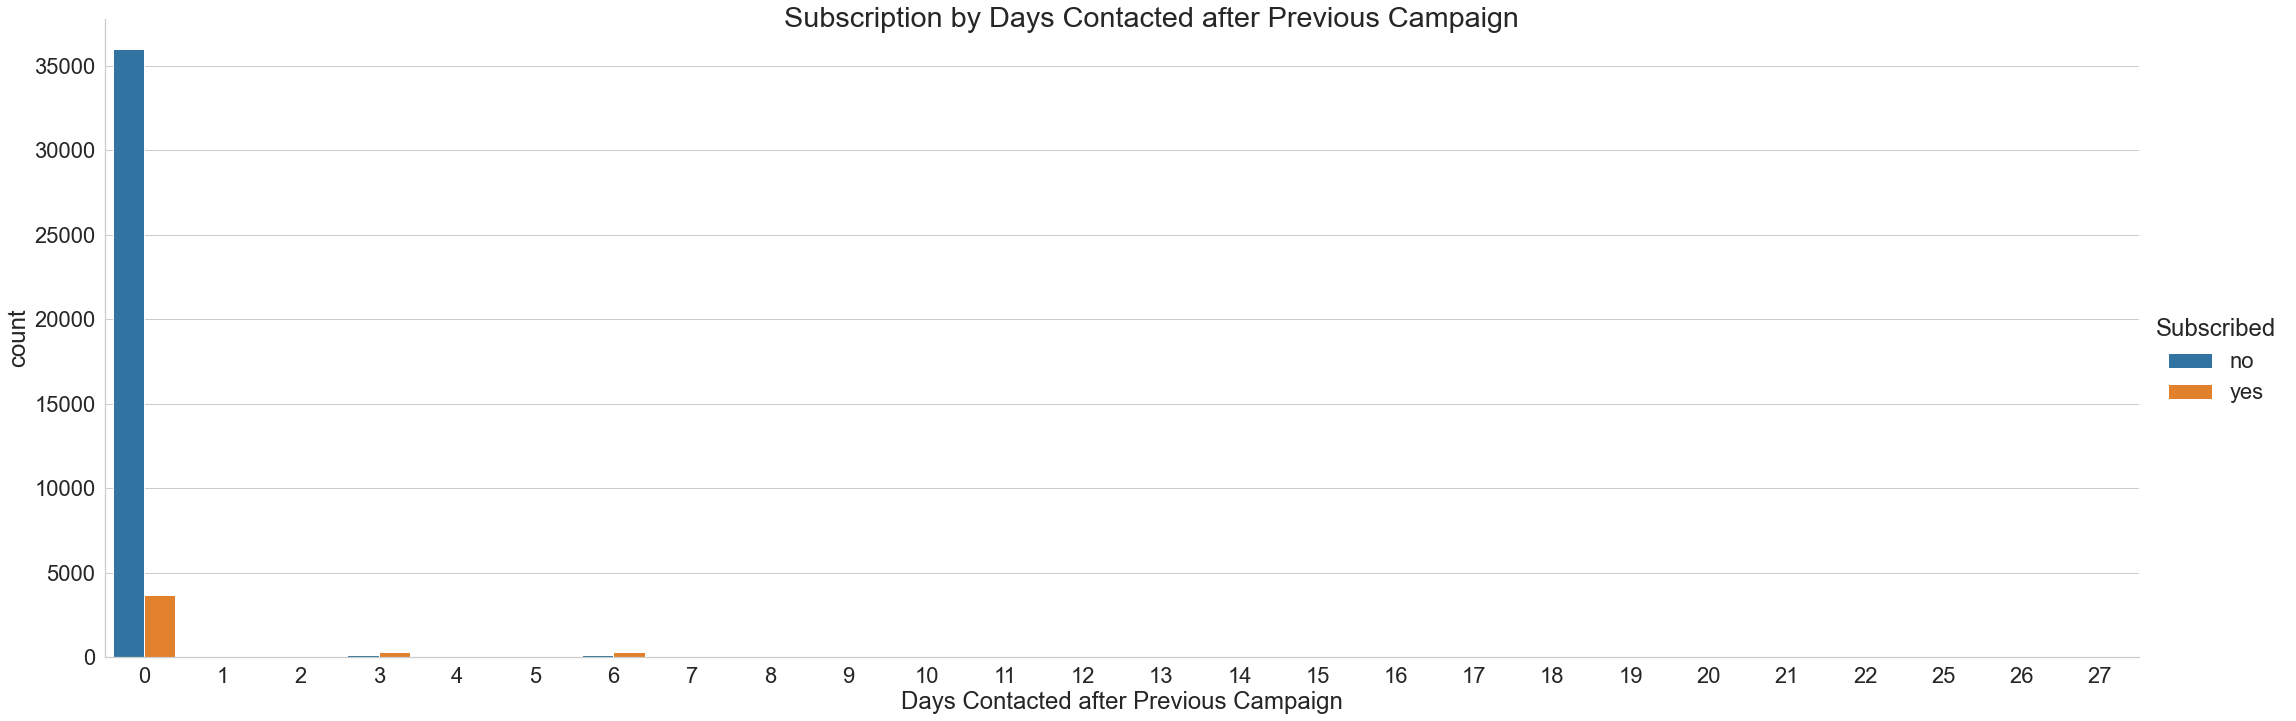

In [76]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
ax=sns.catplot(data=df, x='Days Contacted after Previous Campaign', kind = 'count',hue='Subscribed', height=10, aspect=3)
ax.fig.suptitle('Subscription by Days Contacted after Previous Campaign')

Text(0.5, 0.98, 'Subscription by Employment Var Rate')

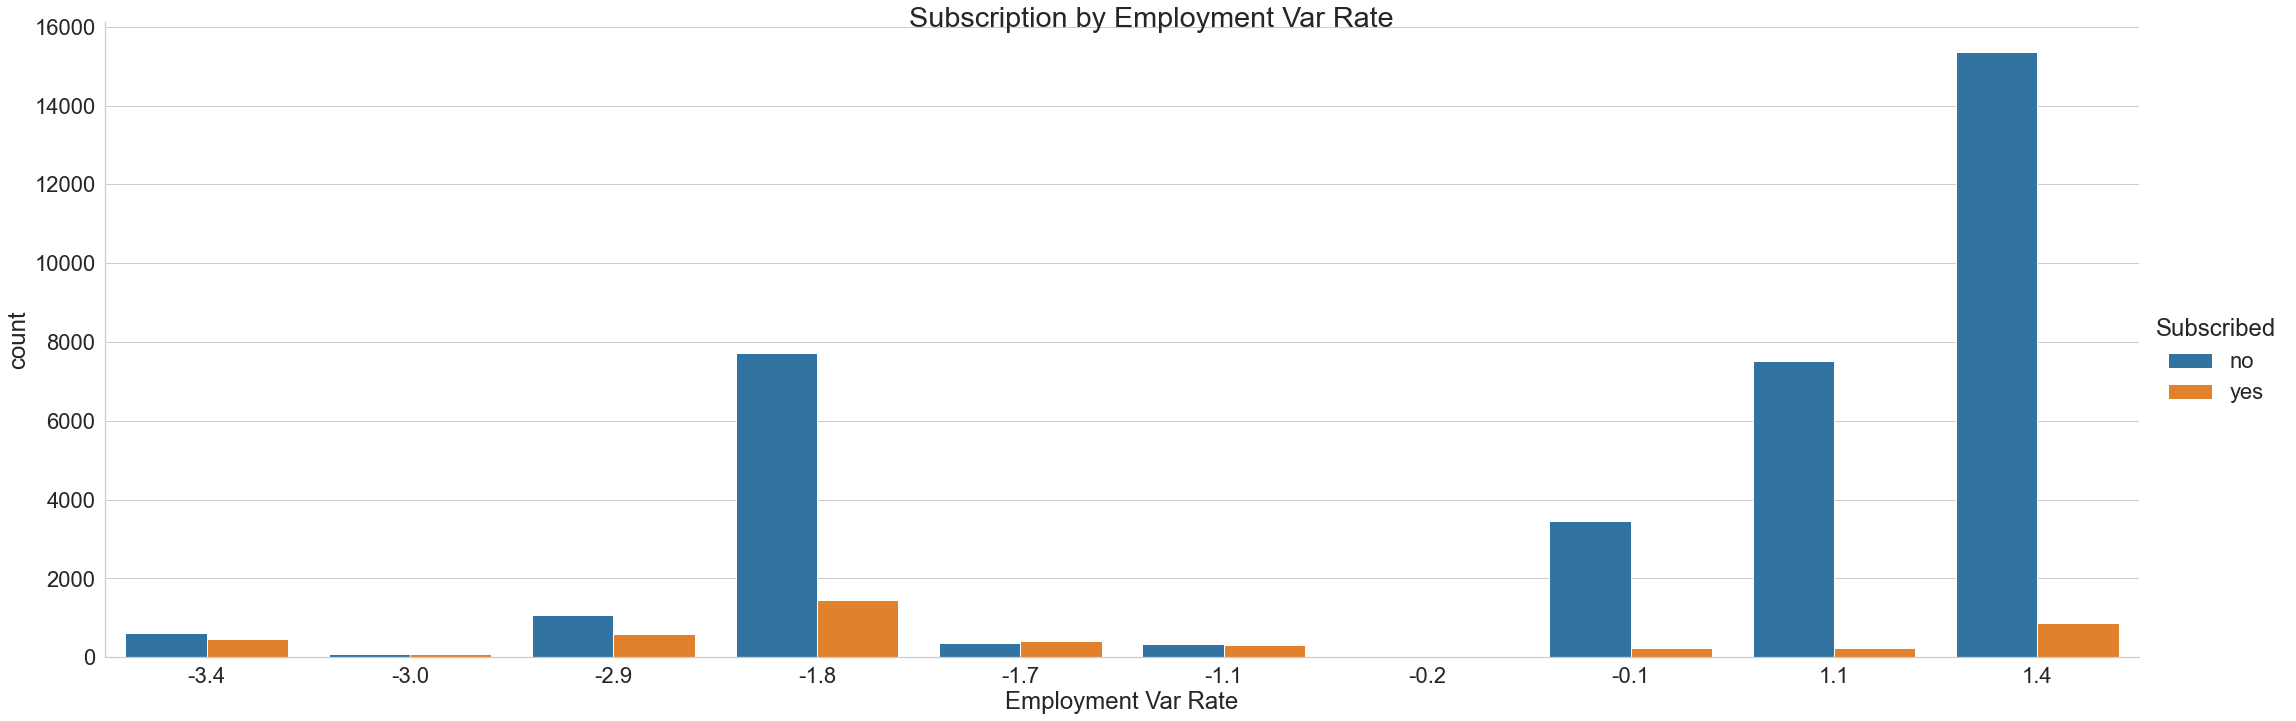

In [77]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
ax=sns.catplot(data=df, x='Employment Var Rate', kind = 'count',hue='Subscribed', height=10, aspect=3)
ax.fig.suptitle('Subscription by Employment Var Rate')

Text(0.5, 0.98, 'Subscription by Consumer Price Index')

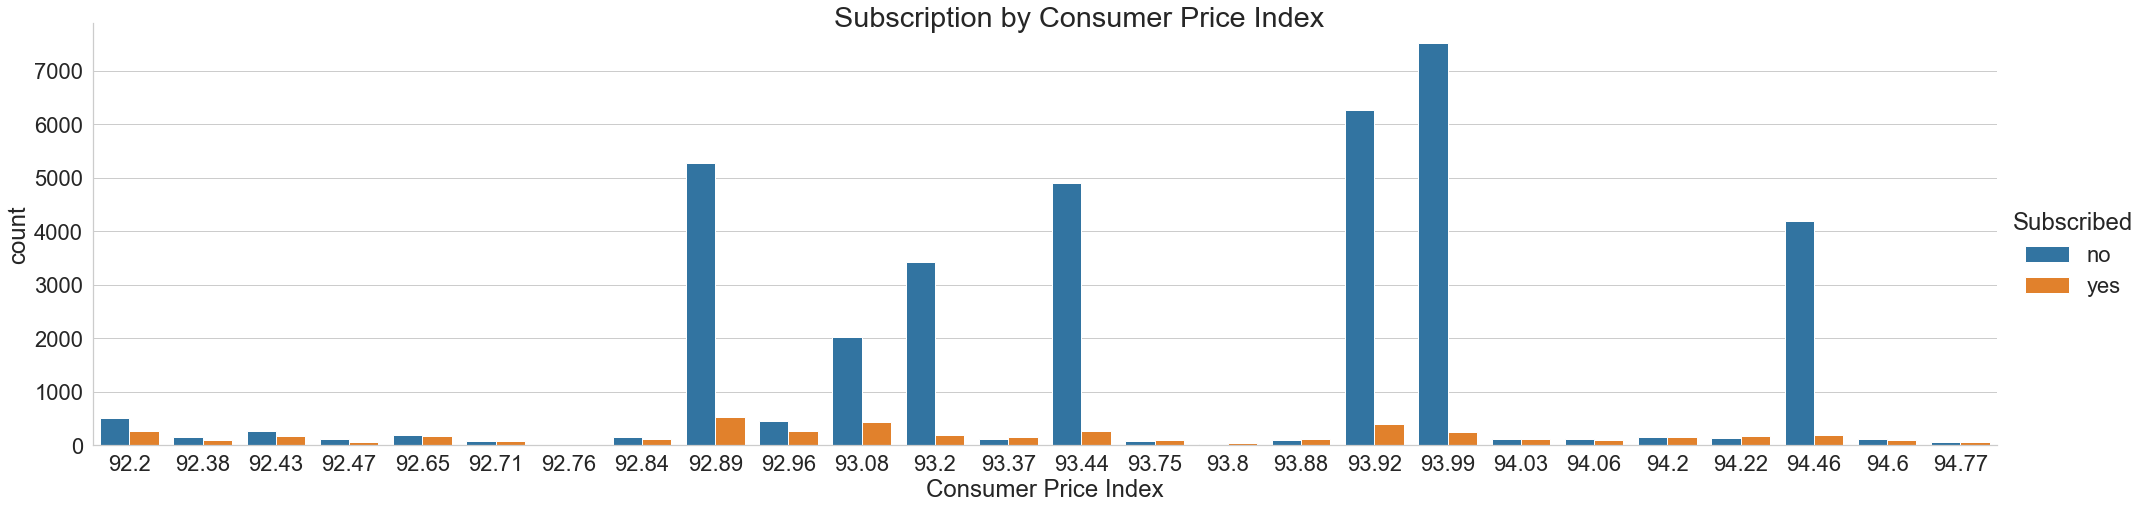

In [78]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
df['Consumer Price Index']=df['Consumer Price Index'].round(decimals=2)
ax=sns.catplot(data=df, x='Consumer Price Index', kind = 'count',hue='Subscribed', height=7, aspect=4)
ax.fig.suptitle('Subscription by Consumer Price Index')

Text(0.5, 0.98, 'Subscription by Euribor 3-mn Rate')

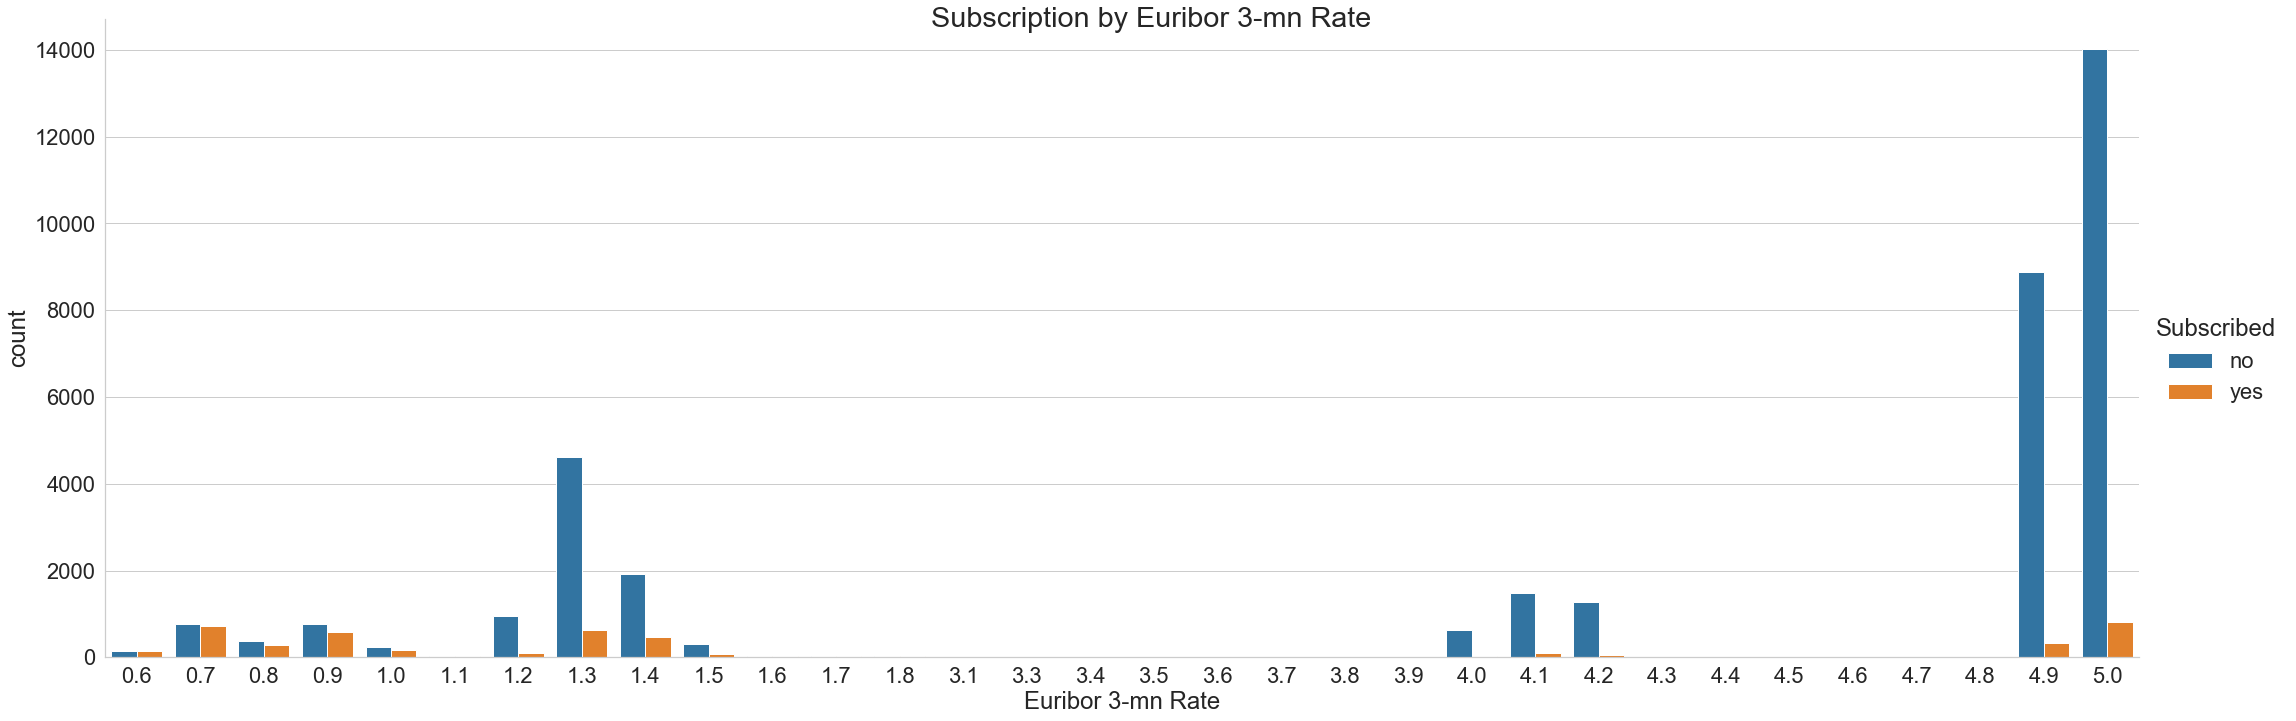

In [79]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
df['Euribor 3-mn Rate']=df['Euribor 3-mn Rate'].round(decimals=1)
ax=sns.catplot(data=df, x='Euribor 3-mn Rate', kind = 'count',hue='Subscribed', height=10, aspect=3)
ax.fig.suptitle('Subscription by Euribor 3-mn Rate')

Text(0.5, 0.98, 'Subscription by No. of Employees')

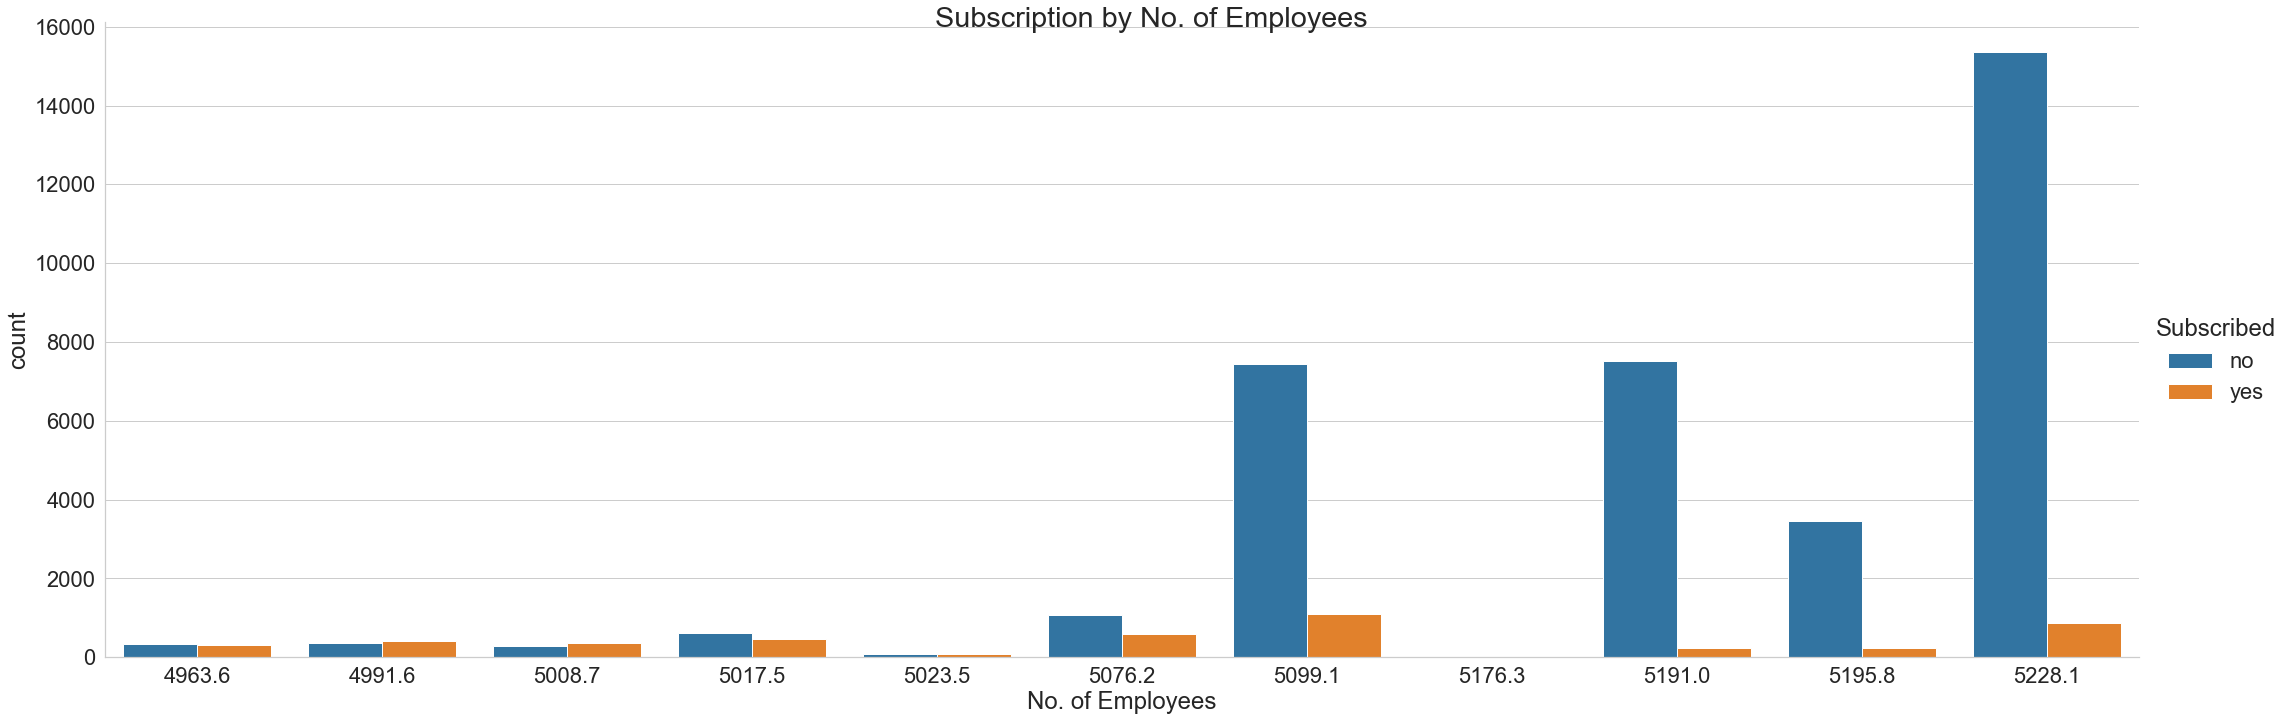

In [80]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
ax=sns.catplot(data=df, x='No. of Employees', kind = 'count',hue='Subscribed', height=10, aspect=3)
ax.fig.suptitle('Subscription by No. of Employees')

## 1. Building a logistic regression model using all variables

In [81]:
df.columns

Index(['Age', 'Job Type', 'Marital Status', 'Education', 'Credit Defaulter',
       'Housing Loan', 'Personal Loan', 'Contact Type', 'Last Contact Month',
       'Last Contact Day of Week', 'Last Contact Duration', 'No. of Contacts',
       'Days Contacted after Previous Campaign',
       'No. of Contacts in Previous Campaign', 'Previous Campaign Outcome',
       'Employment Var Rate', 'Consumer Price Index',
       'Consumer Confidence Index', 'Euribor 3-mn Rate', 'No. of Employees',
       'Subscribed'],
      dtype='object')

### Create Dummy variables

In [82]:
JobType_dummies = pd.get_dummies(df['Job Type'], prefix='JobType')
MaritalStatus_dummies = pd.get_dummies(df['Marital Status'], prefix='MaritalStatus')
Education_dummies = pd.get_dummies(df['Education'], prefix='Education')
CreditDefaulter_dummies = pd.get_dummies(df['Credit Defaulter'], prefix='CreditDefaulter')
HousingLoan_dummies = pd.get_dummies(df['Housing Loan'], prefix='HousingLoan')
PersonalLoan_dummies = pd.get_dummies(df['Personal Loan'], prefix='PersonalLoan')
ContactType_dummies = pd.get_dummies(df['Contact Type'], prefix='ContactType')
LastContactMonth_dummies = pd.get_dummies(df['Last Contact Month'], prefix='LastContactMonth')
LastContactDayofWeek_dummies = pd.get_dummies(df['Last Contact Day of Week'], prefix='LastContactDayofWeek')
PreviousCampaignOutcome_dummies = pd.get_dummies(df['Previous Campaign Outcome'], prefix='PreviousCampaignOutcome')
X1=pd.concat([JobType_dummies,MaritalStatus_dummies,Education_dummies,CreditDefaulter_dummies,HousingLoan_dummies,PersonalLoan_dummies,ContactType_dummies, LastContactMonth_dummies,LastContactDayofWeek_dummies,PreviousCampaignOutcome_dummies],axis=1)
y=df.Subscribed

In [83]:
X1.head()

,JobType_admin,JobType_blue-collar,JobType_entrepreneur,JobType_housemaid,JobType_management,JobType_retired,JobType_self-employed,JobType_services,JobType_student,JobType_technician,...,LastContactMonth_oct,LastContactMonth_sep,LastContactDayofWeek_fri,LastContactDayofWeek_mon,LastContactDayofWeek_thu,LastContactDayofWeek_tue,LastContactDayofWeek_wed,PreviousCampaignOutcome_failure,PreviousCampaignOutcome_nonexistent,PreviousCampaignOutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [84]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: Subscribed, dtype: object

In [85]:
X1.columns

Index(['JobType_admin', 'JobType_blue-collar', 'JobType_entrepreneur',
       'JobType_housemaid', 'JobType_management', 'JobType_retired',
       'JobType_self-employed', 'JobType_services', 'JobType_student',
       'JobType_technician', 'JobType_unemployed', 'JobType_unknown',
       'MaritalStatus_divorced', 'MaritalStatus_married',
       'MaritalStatus_single', 'MaritalStatus_unknown', 'Education_basic',
       'Education_high.school', 'Education_illiterate',
       'Education_professional.course', 'Education_university.degree',
       'Education_unknown', 'CreditDefaulter_no', 'CreditDefaulter_unknown',
       'CreditDefaulter_yes', 'HousingLoan_no', 'HousingLoan_unknown',
       'HousingLoan_yes', 'PersonalLoan_no', 'PersonalLoan_unknown',
       'PersonalLoan_yes', 'ContactType_cellular', 'ContactType_telephone',
       'LastContactMonth_apr', 'LastContactMonth_aug', 'LastContactMonth_dec',
       'LastContactMonth_jul', 'LastContactMonth_jun', 'LastContactMonth_mar',
       '

In [86]:
X2=df[['Age','No. of Contacts','Days Contacted after Previous Campaign','No. of Contacts in Previous Campaign','Employment Var Rate', 'Consumer Price Index','Consumer Confidence Index', 'Euribor 3-mn Rate', 'No. of Employees']]

### Creating a dataframe using all features

In [87]:
X=pd.concat([ X2, X1.set_index(df.index)], axis=1)
X.columns

Index(['Age', 'No. of Contacts', 'Days Contacted after Previous Campaign',
       'No. of Contacts in Previous Campaign', 'Employment Var Rate',
       'Consumer Price Index', 'Consumer Confidence Index',
       'Euribor 3-mn Rate', 'No. of Employees', 'JobType_admin',
       'JobType_blue-collar', 'JobType_entrepreneur', 'JobType_housemaid',
       'JobType_management', 'JobType_retired', 'JobType_self-employed',
       'JobType_services', 'JobType_student', 'JobType_technician',
       'JobType_unemployed', 'JobType_unknown', 'MaritalStatus_divorced',
       'MaritalStatus_married', 'MaritalStatus_single',
       'MaritalStatus_unknown', 'Education_basic', 'Education_high.school',
       'Education_illiterate', 'Education_professional.course',
       'Education_university.degree', 'Education_unknown',
       'CreditDefaulter_no', 'CreditDefaulter_unknown', 'CreditDefaulter_yes',
       'HousingLoan_no', 'HousingLoan_unknown', 'HousingLoan_yes',
       'PersonalLoan_no', 'PersonalLoan

In [88]:
X.head()

,Age,No. of Contacts,Days Contacted after Previous Campaign,No. of Contacts in Previous Campaign,Employment Var Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-mn Rate,No. of Employees,JobType_admin,...,LastContactMonth_oct,LastContactMonth_sep,LastContactDayofWeek_fri,LastContactDayofWeek_mon,LastContactDayofWeek_thu,LastContactDayofWeek_tue,LastContactDayofWeek_wed,PreviousCampaignOutcome_failure,PreviousCampaignOutcome_nonexistent,PreviousCampaignOutcome_success
0,56,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,0,0,1.1,93.99,-36.4,4.9,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


**Creating training set and test set**

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27587, 60)
(27587,)
(13589, 60)
(13589,)


In [91]:
# Logistic Regression
model_lg = linear_model.LogisticRegression(solver='liblinear')
model_lg.fit(X_train,y_train)
model_lg.score(X_train,y_train)

0.9001341211440171

In [92]:
# Model valdiation steps
y_actual = y_test 
y_pred =  model_lg.predict(X_test)


from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy_model_lg = accuracy_score(y_actual, y_pred)

precision_model_lg = results[0]
recall_model_lg = results[1]
fscore_model_lg = results[2]

print(precision_model_lg)
print(recall_model_lg)
print(fscore_model_lg)
print(accuracy_model_lg)

0.7865884449162182
0.5812514845781218
0.6098694155050762
0.8963131944955479


In [93]:
conf_matrix_model_lg = metrics.confusion_matrix(y_actual, y_pred,labels=['yes','no'])
conf_matrix_model_lg

array([[  268,  1277],
       [  132, 11912]], dtype=int64)

### Which shows 268+11912 correct predictions and 132+1277 incorrect predictions

## 2. Building a logistic regression model using a subset of features

In [94]:
X.columns

Index(['Age', 'No. of Contacts', 'Days Contacted after Previous Campaign',
       'No. of Contacts in Previous Campaign', 'Employment Var Rate',
       'Consumer Price Index', 'Consumer Confidence Index',
       'Euribor 3-mn Rate', 'No. of Employees', 'JobType_admin',
       'JobType_blue-collar', 'JobType_entrepreneur', 'JobType_housemaid',
       'JobType_management', 'JobType_retired', 'JobType_self-employed',
       'JobType_services', 'JobType_student', 'JobType_technician',
       'JobType_unemployed', 'JobType_unknown', 'MaritalStatus_divorced',
       'MaritalStatus_married', 'MaritalStatus_single',
       'MaritalStatus_unknown', 'Education_basic', 'Education_high.school',
       'Education_illiterate', 'Education_professional.course',
       'Education_university.degree', 'Education_unknown',
       'CreditDefaulter_no', 'CreditDefaulter_unknown', 'CreditDefaulter_yes',
       'HousingLoan_no', 'HousingLoan_unknown', 'HousingLoan_yes',
       'PersonalLoan_no', 'PersonalLoan

### Using RFE
RFE is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [95]:
from sklearn.feature_selection import RFE
predictor=X_train
selector=RFE(model_lg, n_features_to_select=1)
selector=selector.fit(predictor, y_train)

In [96]:
order=selector.ranking_
order

array([52, 55, 33, 14, 36, 39, 37,  4, 46, 17, 44, 43, 50, 19,  9, 18, 23,
       10, 41, 60, 54, 48, 40, 24, 58, 21, 34, 53, 47, 30, 29, 25, 12, 59,
       31, 32, 49, 42, 22, 57, 45, 16, 38, 20,  7,  8, 15,  2,  3, 35,  6,
       11, 51, 13, 28, 27, 26,  5, 56,  1])

In [97]:
import operator
feat_dict={x:y for x,y in zip(X.columns,order)}
feat_dict = sorted(feat_dict.items(), key=operator.itemgetter(1))
#feat_dict
newDict = { key for (key,value) in feat_dict if value <=30}
newDict

{'ContactType_telephone',
 'CreditDefaulter_no',
 'CreditDefaulter_unknown',
 'Education_basic',
 'Education_university.degree',
 'Education_unknown',
 'Euribor 3-mn Rate',
 'JobType_admin',
 'JobType_management',
 'JobType_retired',
 'JobType_self-employed',
 'JobType_services',
 'JobType_student',
 'LastContactDayofWeek_mon',
 'LastContactDayofWeek_thu',
 'LastContactDayofWeek_tue',
 'LastContactDayofWeek_wed',
 'LastContactMonth_aug',
 'LastContactMonth_dec',
 'LastContactMonth_jul',
 'LastContactMonth_jun',
 'LastContactMonth_mar',
 'LastContactMonth_may',
 'LastContactMonth_oct',
 'LastContactMonth_sep',
 'MaritalStatus_single',
 'No. of Contacts in Previous Campaign',
 'PersonalLoan_unknown',
 'PreviousCampaignOutcome_failure',
 'PreviousCampaignOutcome_success'}

In [98]:
X_RFE=X[['ContactType_telephone', 'CreditDefaulter_no', 'CreditDefaulter_unknown', 'Education_basic', 'Education_university.degree',
 'Education_unknown', 'Euribor 3-mn Rate', 'JobType_admin', 'JobType_management', 'JobType_retired', 'JobType_self-employed', 'JobType_services',
 'JobType_student', 'LastContactDayofWeek_mon', 'LastContactDayofWeek_thu', 'LastContactDayofWeek_tue', 'LastContactDayofWeek_wed',
 'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_jul', 'LastContactMonth_jun', 'LastContactMonth_mar', 'LastContactMonth_may',
 'LastContactMonth_oct', 'LastContactMonth_sep', 'MaritalStatus_single', 'No. of Contacts in Previous Campaign', 'PersonalLoan_unknown',
 'PreviousCampaignOutcome_failure', 'PreviousCampaignOutcome_success']]

In [99]:
X_RFE.head()

,ContactType_telephone,CreditDefaulter_no,CreditDefaulter_unknown,Education_basic,Education_university.degree,Education_unknown,Euribor 3-mn Rate,JobType_admin,JobType_management,JobType_retired,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_oct,LastContactMonth_sep,MaritalStatus_single,No. of Contacts in Previous Campaign,PersonalLoan_unknown,PreviousCampaignOutcome_failure,PreviousCampaignOutcome_success
0,1,1,0,1,0,0,4.9,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,0,0,4.9,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,4.9,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,1,0,0,4.9,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,0,0,4.9,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [100]:
from sklearn.model_selection import train_test_split
X_RFE_train, X_RFE_test, y_train, y_test = train_test_split(X_RFE, y, test_size=0.33, random_state=42)

In [101]:
print(X_RFE_train.shape)
print(y_train.shape)
print(X_RFE_test.shape)
print(y_test.shape)

(27587, 30)
(27587,)
(13589, 30)
(13589,)


In [102]:
# Logistic Regression
model_lg_RFE = linear_model.LogisticRegression(solver='liblinear')
model_lg_RFE.fit(X_RFE_train,y_train)
model_lg_RFE.score(X_RFE_train,y_train)

0.8996991336499076

In [103]:
# Model valdiation steps
y_actual = y_test 
y_pred =  model_lg_RFE.predict(X_RFE_test)

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy_lg_RFE = accuracy_score(y_actual, y_pred)

precision_lg_RFE = results[0]
recall_lg_RFE = results[1]
fscore_lg_RFE = results[2]

print(precision_lg_RFE)
print(recall_lg_RFE)
print(fscore_lg_RFE)
print(accuracy_lg_RFE)


0.7978263489162798
0.5948352266070793
0.6285302317763952
0.8988888071234087


In [104]:
conf_matrix_lg_RFE = metrics.confusion_matrix(y_actual, y_pred,labels=['yes','no'])
conf_matrix_lg_RFE

array([[  311,  1234],
       [  140, 11904]], dtype=int64)

### Using SFM
The intended method for this function is that it will select the features by importance

In [105]:
from sklearn.feature_selection import SelectFromModel
smf=SelectFromModel(model_lg, threshold=-np.inf, max_features=30)
smf.fit(X_train,y_train)
feature_idx=smf.get_support()
feature_name=X.columns[feature_idx]
feature_name

Index(['Days Contacted after Previous Campaign', 'Employment Var Rate',
       'Consumer Price Index', 'Euribor 3-mn Rate', 'JobType_admin',
       'JobType_blue-collar', 'JobType_retired', 'JobType_services',
       'JobType_student', 'MaritalStatus_married', 'MaritalStatus_single',
       'Education_basic', 'Education_university.degree', 'CreditDefaulter_no',
       'CreditDefaulter_unknown', 'ContactType_cellular',
       'ContactType_telephone', 'LastContactMonth_apr', 'LastContactMonth_jul',
       'LastContactMonth_jun', 'LastContactMonth_mar', 'LastContactMonth_may',
       'LastContactMonth_nov', 'LastContactDayofWeek_mon',
       'LastContactDayofWeek_thu', 'LastContactDayofWeek_tue',
       'LastContactDayofWeek_wed', 'PreviousCampaignOutcome_failure',
       'PreviousCampaignOutcome_nonexistent',
       'PreviousCampaignOutcome_success'],
      dtype='object')

In [106]:
X_SFM=X[['Days Contacted after Previous Campaign', 'Employment Var Rate',
       'Consumer Price Index', 'Euribor 3-mn Rate', 'JobType_admin',
       'JobType_blue-collar', 'JobType_retired', 'JobType_services',
       'JobType_student', 'MaritalStatus_married', 'MaritalStatus_single',
       'Education_basic', 'Education_university.degree', 'CreditDefaulter_no',
       'CreditDefaulter_unknown', 'ContactType_cellular',
       'ContactType_telephone', 'LastContactMonth_apr', 'LastContactMonth_jul',
       'LastContactMonth_jun', 'LastContactMonth_mar', 'LastContactMonth_may',
       'LastContactMonth_nov', 'LastContactDayofWeek_mon',
       'LastContactDayofWeek_thu', 'LastContactDayofWeek_tue',
       'LastContactDayofWeek_wed', 'PreviousCampaignOutcome_failure',
       'PreviousCampaignOutcome_nonexistent',
       'PreviousCampaignOutcome_success']]

In [107]:
X_SFM.head()

,Days Contacted after Previous Campaign,Employment Var Rate,Consumer Price Index,Euribor 3-mn Rate,JobType_admin,JobType_blue-collar,JobType_retired,JobType_services,JobType_student,MaritalStatus_married,...,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactDayofWeek_mon,LastContactDayofWeek_thu,LastContactDayofWeek_tue,LastContactDayofWeek_wed,PreviousCampaignOutcome_failure,PreviousCampaignOutcome_nonexistent,PreviousCampaignOutcome_success
0,0,1.1,93.99,4.9,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,0,1.1,93.99,4.9,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,0,1.1,93.99,4.9,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
3,0,1.1,93.99,4.9,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,0,1.1,93.99,4.9,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0


In [108]:
from sklearn.model_selection import train_test_split
X_SFM_train, X_SFM_test, y_train, y_test = train_test_split(X_SFM, y, test_size=0.33, random_state=42)

In [109]:
print(X_SFM_train.shape)
print(y_train.shape)
print(X_SFM_test.shape)
print(y_test.shape)

(27587, 30)
(27587,)
(13589, 30)
(13589,)


In [110]:
# Logistic Regression
model_lg_SFM = linear_model.LogisticRegression(solver='liblinear')
model_lg_SFM.fit(X_SFM_train,y_train)
model_lg_SFM.score(X_SFM_train,y_train)

0.8995541378185378

In [111]:
# Model valdiation steps
y_actual = y_test 
y_pred =  model_lg_SFM.predict(X_SFM_test)

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy_lg_SFM = accuracy_score(y_actual, y_pred)

precision_lg_SFM = results[0]
recall_lg_SFM = results[1]
fscore_lg_SFM = results[2]

print(precision_lg_SFM)
print(recall_lg_SFM)
print(fscore_lg_SFM)
print(accuracy_lg_SFM)


0.8012736440920054
0.5895496716999911
0.6217624112283446
0.8985208624622857


In [112]:
conf_matrix_lg_SFM = metrics.confusion_matrix(y_actual, y_pred,labels=['yes','no'])
conf_matrix_lg_SFM

array([[  293,  1252],
       [  127, 11917]], dtype=int64)

### without using any feature importance formula, the following subset was chosen based on data visualization

In [113]:
X_sub=X[['Age','No. of Contacts'
         ,'Days Contacted after Previous Campaign','No. of Contacts in Previous Campaign','Employment Var Rate'
         , 'Consumer Price Index', 'Consumer Confidence Index','Euribor 3-mn Rate','No. of Employees'
         ,'JobType_blue-collar', 'JobType_entrepreneur', 'JobType_housemaid','JobType_management', 'JobType_retired', 'JobType_self-employed'
         ,'JobType_services', 'JobType_student', 'JobType_technician','JobType_unemployed', 'JobType_unknown'
         ,'Education_basic', 'Education_high.school','Education_illiterate', 'Education_professional.course','Education_university.degree', 'Education_unknown'
         ,'CreditDefaulter_no', 'CreditDefaulter_unknown'
         ,'HousingLoan_no', 'HousingLoan_unknown'
         ,'PersonalLoan_no', 'PersonalLoan_unknown'
         ,'LastContactMonth_apr',
          'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_jul',
          'LastContactMonth_jun', 'LastContactMonth_mar', 'LastContactMonth_may',
          'LastContactMonth_nov', 'LastContactMonth_oct', 'LastContactMonth_sep'
         ,'PreviousCampaignOutcome_failure','PreviousCampaignOutcome_success']]

In [114]:
X_sub.head()

,Age,No. of Contacts,Days Contacted after Previous Campaign,No. of Contacts in Previous Campaign,Employment Var Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-mn Rate,No. of Employees,JobType_blue-collar,...,LastContactMonth_dec,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,PreviousCampaignOutcome_failure,PreviousCampaignOutcome_success
0,56,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,0,1,0,0,0,0,0
1,57,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,0,1,0,0,0,0,0
2,37,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,0,1,0,0,0,0,0
3,40,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,0,1,0,0,0,0,0
4,56,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,0,1,0,0,0,0,0


In [115]:
from sklearn.model_selection import train_test_split
X_sub_train, X_sub_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.33, random_state=42)

In [116]:
print(X_sub_train.shape)
print(y_train.shape)
print(X_sub_test.shape)
print(y_test.shape)

(27587, 44)
(27587,)
(13589, 44)
(13589,)


In [117]:
# Logistic Regression
model_lg_sub = linear_model.LogisticRegression(solver='liblinear')
model_lg_sub.fit(X_sub_train,y_train)
model_lg_sub.score(X_sub_train,y_train)

0.8990104034509008

In [118]:
# Model valdiation steps
y_actual = y_test 
y_pred =  model_lg_sub.predict(X_sub_test)

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy_lg_sub = accuracy_score(y_actual, y_pred)

precision_lg_sub = results[0]
recall_lg_sub = results[1]
fscore_lg_sub = results[2]

print(precision_lg_sub)
print(recall_lg_sub)
print(fscore_lg_sub)
print(accuracy_lg_sub)


0.8000451999464833
0.5891845326574943
0.6212138432968413
0.8983736845978365


In [119]:
conf_matrix_lg_sub = metrics.confusion_matrix(y_actual, y_pred,labels=['yes','no'])
conf_matrix_lg_sub

array([[  292,  1253],
       [  128, 11916]], dtype=int64)

## Trying a different subset

**I removed all the unknown features, Which actually dropped model score.** 

In [120]:
X_sub_nu=X[['Age','No. of Contacts'
         ,'Days Contacted after Previous Campaign','No. of Contacts in Previous Campaign','Employment Var Rate'
         , 'Consumer Price Index', 'Consumer Confidence Index','Euribor 3-mn Rate','No. of Employees'
         ,'JobType_blue-collar', 'JobType_entrepreneur', 'JobType_housemaid','JobType_management', 'JobType_retired', 'JobType_self-employed'
         ,'JobType_services', 'JobType_student', 'JobType_technician','JobType_unemployed'
         ,'Education_basic', 'Education_high.school','Education_illiterate', 'Education_professional.course','Education_university.degree'
         ,'CreditDefaulter_no', 'CreditDefaulter_yes'
         ,'HousingLoan_no','HousingLoan_yes'
         ,'PersonalLoan_no','PersonalLoan_yes'
         ,'LastContactMonth_apr',
          'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_jul',
          'LastContactMonth_jun', 'LastContactMonth_mar', 'LastContactMonth_may',
          'LastContactMonth_nov', 'LastContactMonth_oct', 'LastContactMonth_sep'
         ,'PreviousCampaignOutcome_failure','PreviousCampaignOutcome_success']]

In [121]:
X_sub_nu.head()

,Age,No. of Contacts,Days Contacted after Previous Campaign,No. of Contacts in Previous Campaign,Employment Var Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-mn Rate,No. of Employees,JobType_blue-collar,...,LastContactMonth_dec,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,PreviousCampaignOutcome_failure,PreviousCampaignOutcome_success
0,56,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,0,1,0,0,0,0,0
1,57,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,0,1,0,0,0,0,0
2,37,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,0,1,0,0,0,0,0
3,40,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,0,1,0,0,0,0,0
4,56,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,0,1,0,0,0,0,0


In [122]:
from sklearn.model_selection import train_test_split
X_sub_nu_train, X_sub_nu_test, y_train, y_test = train_test_split(X_sub_nu, y, test_size=0.33, random_state=42)

In [123]:
print(X_sub_nu_train.shape)
print(y_train.shape)
print(X_sub_nu_test.shape)
print(y_test.shape)

(27587, 42)
(27587,)
(13589, 42)
(13589,)


In [124]:
# Logistic Regression
model_lg_sub_nu = linear_model.LogisticRegression(solver='liblinear')
model_lg_sub_nu.fit(X_sub_nu_train,y_train)
model_lg_sub_nu.score(X_sub_nu_train,y_train)

0.8982854242940516

In [125]:
# Model valdiation steps
y_actual = y_test 
y_pred =  model_lg_sub_nu.predict(X_sub_nu_test)

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy_lg_sub_nu = accuracy_score(y_actual, y_pred)

precision_lg_sub_nu = results[0]
recall_lg_sub_nu = results[1]
fscore_lg_sub_nu = results[2]

print(precision_lg_sub_nu)
print(recall_lg_sub_nu)
print(fscore_lg_sub_nu)
print(accuracy_lg_sub_nu)


0.8051882040743491
0.5854755862807247
0.6164350843883752
0.8983000956656119


In [126]:
conf_matrix_lg_sub_nu = metrics.confusion_matrix(y_actual, y_pred,labels=['yes','no'])
conf_matrix_lg_sub_nu

array([[  279,  1266],
       [  116, 11928]], dtype=int64)

In [127]:
print("Logistic Regression model with all features score:", model_lg.score(X_train,y_train))
print("Logistic Regression model with a subset of features score:", model_lg_sub.score(X_sub_train,y_train))
print("Logistic Regression model with a subset of features (removing unknowns) score:", model_lg_sub_nu.score(X_sub_nu_train,y_train))
print("Logistic Regression model with a subset of features (RFE) score:", model_lg_RFE.score(X_RFE_train,y_train))
print("Logistic Regression model with a subset of features (SFM) score:", model_lg_SFM.score(X_SFM_train,y_train))

Logistic Regression model with all features score: 0.9001341211440171
Logistic Regression model with a subset of features score: 0.8990104034509008
Logistic Regression model with a subset of features (removing unknowns) score: 0.8982854242940516
Logistic Regression model with a subset of features (RFE) score: 0.8996991336499076
Logistic Regression model with a subset of features (SFM) score: 0.8995541378185378


## 3. Building a decision tree model using all variables

In [128]:
X.head()

,Age,No. of Contacts,Days Contacted after Previous Campaign,No. of Contacts in Previous Campaign,Employment Var Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-mn Rate,No. of Employees,JobType_admin,...,LastContactMonth_oct,LastContactMonth_sep,LastContactDayofWeek_fri,LastContactDayofWeek_mon,LastContactDayofWeek_thu,LastContactDayofWeek_tue,LastContactDayofWeek_wed,PreviousCampaignOutcome_failure,PreviousCampaignOutcome_nonexistent,PreviousCampaignOutcome_success
0,56,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,0,0,1.1,93.99,-36.4,4.9,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,0,0,1.1,93.99,-36.4,4.9,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [129]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: Subscribed, dtype: object

In [130]:
# Decision Tree

from sklearn import tree

model_dt = tree.DecisionTreeClassifier(max_depth=11)
model_dt.fit(X_train,y_train)
model_dt.score(X_train,y_train)

0.9227534708377134

In [131]:
# Model valdiation steps
y_actual = y_test 
y_pred =  model_dt.predict(X_test)


from sklearn.metrics import precision_recall_fscore_support

results2 = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy_model_dt = accuracy_score(y_actual, y_pred)

precision_model_dt  = results2[0]
recall_model_dt  = results2[1]
fscore_model_dt  = results2[2]

print(precision_model_dt )
print(recall_model_dt )
print(fscore_model_dt )
print(accuracy_model_dt )

0.7314685474689157
0.6179739283898629
0.6487702841641421
0.8918978585620723


In [132]:
conf_matrix_model_dt = metrics.confusion_matrix(y_actual, y_pred,labels=['yes','no'])
conf_matrix_model_dt

array([[  407,  1138],
       [  331, 11713]], dtype=int64)

In [133]:
feat_imp = model_dt.feature_importances_

feat_imp

array([1.07427580e-01, 3.97533617e-02, 2.22622545e-02, 1.36937659e-02,
       7.85515056e-03, 7.83572620e-03, 4.99042408e-02, 2.40232399e-02,
       4.16121999e-01, 5.34331815e-03, 5.54113070e-03, 4.10224192e-03,
       1.69249970e-03, 2.70910134e-03, 1.00485294e-02, 6.56394275e-03,
       2.55970762e-03, 2.06434286e-03, 8.52551808e-03, 4.90120185e-03,
       5.09502754e-03, 1.77123122e-03, 6.30404216e-03, 5.31667869e-03,
       3.90363085e-04, 6.64773043e-03, 3.75742974e-03, 2.48140583e-04,
       6.25789590e-03, 7.19415927e-03, 5.19874729e-03, 3.72641856e-03,
       2.08949507e-03, 0.00000000e+00, 6.54205477e-03, 6.28596912e-04,
       5.14908668e-03, 3.59958496e-03, 0.00000000e+00, 5.42193792e-03,
       3.88643012e-03, 1.46344041e-02, 2.14742661e-02, 2.30949006e-03,
       6.58116157e-04, 1.69086862e-03, 4.20368213e-03, 1.48215139e-03,
       0.00000000e+00, 1.62580002e-04, 1.30386060e-02, 1.07675983e-03,
       4.12475673e-03, 1.11898032e-02, 1.07994477e-02, 5.80910951e-03,
      

## 4. Building a decision tree model using a subset of features

In [134]:
feat_dict={x:y for x,y in zip(X.columns,feat_imp)}
feat_dict = sorted(feat_dict.items(), key=operator.itemgetter(1))
#feat_dict
newDict = { key for (key,value) in feat_dict if value >=.005}
newDict

{'Age',
 'Consumer Confidence Index',
 'Consumer Price Index',
 'ContactType_telephone',
 'Days Contacted after Previous Campaign',
 'Education_basic',
 'Education_professional.course',
 'Education_university.degree',
 'Education_unknown',
 'Employment Var Rate',
 'Euribor 3-mn Rate',
 'HousingLoan_no',
 'HousingLoan_yes',
 'JobType_admin',
 'JobType_blue-collar',
 'JobType_retired',
 'JobType_self-employed',
 'JobType_technician',
 'JobType_unknown',
 'LastContactDayofWeek_mon',
 'LastContactDayofWeek_thu',
 'LastContactDayofWeek_tue',
 'LastContactDayofWeek_wed',
 'LastContactMonth_apr',
 'LastContactMonth_oct',
 'MaritalStatus_married',
 'MaritalStatus_single',
 'No. of Contacts',
 'No. of Contacts in Previous Campaign',
 'No. of Employees',
 'PersonalLoan_yes',
 'PreviousCampaignOutcome_success'}

In [135]:
X_sub=X[['Age', 'Consumer Confidence Index', 'Consumer Price Index', 'ContactType_telephone', 'Days Contacted after Previous Campaign',
 'Education_high.school', 'Education_professional.course', 'Education_university.degree', 'Euribor 3-mn Rate', 'HousingLoan_no',
 'HousingLoan_yes', 'JobType_admin', 'JobType_blue-collar', 'JobType_retired', 'JobType_self-employed', 'JobType_technician',
 'JobType_unknown', 'LastContactDayofWeek_mon', 'LastContactDayofWeek_thu', 'LastContactDayofWeek_tue', 'LastContactDayofWeek_wed',
 'LastContactMonth_apr', 'LastContactMonth_mar', 'LastContactMonth_oct', 'MaritalStatus_married', 'MaritalStatus_single', 'No. of Contacts',
 'No. of Contacts in Previous Campaign', 'No. of Employees', 'PersonalLoan_no', 'PreviousCampaignOutcome_success']]


In [136]:
X_sub.head()

,Age,Consumer Confidence Index,Consumer Price Index,ContactType_telephone,Days Contacted after Previous Campaign,Education_high.school,Education_professional.course,Education_university.degree,Euribor 3-mn Rate,HousingLoan_no,...,LastContactMonth_apr,LastContactMonth_mar,LastContactMonth_oct,MaritalStatus_married,MaritalStatus_single,No. of Contacts,No. of Contacts in Previous Campaign,No. of Employees,PersonalLoan_no,PreviousCampaignOutcome_success
0,56,-36.4,93.99,1,0,0,0,0,4.9,1,...,0,0,0,1,0,1,0,5191.0,1,0
1,57,-36.4,93.99,1,0,1,0,0,4.9,1,...,0,0,0,1,0,1,0,5191.0,1,0
2,37,-36.4,93.99,1,0,1,0,0,4.9,0,...,0,0,0,1,0,1,0,5191.0,1,0
3,40,-36.4,93.99,1,0,0,0,0,4.9,1,...,0,0,0,1,0,1,0,5191.0,1,0
4,56,-36.4,93.99,1,0,1,0,0,4.9,1,...,0,0,0,1,0,1,0,5191.0,0,0


In [137]:
y=df[['Subscribed']]
y.head()

,Subscribed
0,no
1,no
2,no
3,no
4,no


In [138]:
# Decision Tree

from sklearn import tree

model_dt_sub = tree.DecisionTreeClassifier(max_depth=11)
model_dt_sub.fit(X_sub_train,y_train)
model_dt_sub.score(X_sub_train,y_train)

0.9153224344800087

In [139]:
# Model valdiation steps
y_actual = y_test 
y_pred =  model_dt_sub.predict(X_sub_test)


from sklearn.metrics import precision_recall_fscore_support

results2 = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy_dt_sub = accuracy_score(y_actual, y_pred)

precision_dt_sub = results2[0]
recall_dt_sub = results2[1]
fscore_dt_sub = results2[2]

print(precision_dt_sub)
print(recall_dt_sub)
print(fscore_dt_sub)
print(accuracy_dt_sub)

0.7345884699795807
0.599031033997242
0.6287724260456196
0.8918242696298476


In [140]:
conf_matrix_dt_sub = metrics.confusion_matrix(y_actual, y_pred,labels=['yes','no'])
conf_matrix_dt_sub

array([[  340,  1205],
       [  265, 11779]], dtype=int64)

In [141]:
feat_imp_sub = model_dt_sub.feature_importances_

feat_imp_sub

array([9.83718600e-02, 4.77872982e-02, 3.02647848e-02, 1.47660041e-02,
       2.34697220e-03, 2.25175505e-02, 4.92687183e-02, 3.01281921e-02,
       4.68245633e-01, 5.13709304e-03, 6.46593488e-03, 1.78771480e-03,
       3.47159318e-03, 6.79816917e-03, 8.86257099e-03, 4.59998493e-03,
       5.41043986e-03, 9.26911364e-03, 5.09957098e-03, 5.03411551e-03,
       6.72430047e-03, 7.93969070e-03, 1.83615385e-04, 6.56759589e-03,
       1.01089869e-02, 4.53860613e-03, 3.73009721e-03, 2.99520969e-03,
       7.59248834e-03, 1.12902622e-04, 1.24765905e-02, 3.45903695e-03,
       2.23699747e-03, 9.61935331e-04, 8.74678487e-04, 1.98686362e-03,
       0.00000000e+00, 1.61505499e-03, 1.79440719e-03, 0.00000000e+00,
       1.24156536e-02, 0.00000000e+00, 3.90783708e-03, 8.21441374e-02])

In [142]:
print("Decision Tree model with all features score:", model_dt.score(X_train,y_train))
print("Decision Tree model with a subset of features score:", model_dt_sub.score(X_sub_train,y_train))

Decision Tree model with all features score: 0.9227534708377134
Decision Tree model with a subset of features score: 0.9153224344800087


## Final Results :

**Accuracy** tells us how well the model is performing in predicting the True positive AND True negative. So it is telling you how well the model is predicting the consumers who actually said yes AND who actually said no <br>
**Precision** tells us of the actual customers who subscribed how many did the model correctly predict <br>
**Recall** tells us of the customer that the model predicted subscribed how many actually subscribed

### 1. Logistic regression using all features:

In [143]:
print(color.BOLD + "Score:     " + color.END, round(model_lg.score(X_train,y_train),3))
print(color.BOLD + "Accuracy:  "+ color.END, round(accuracy_model_lg,3))
print(color.BOLD + "Precision: "+ color.END, round(precision_model_lg,3))
print(color.BOLD + "Recall:    "+ color.END, round(recall_model_lg,3))
print(color.BOLD + "Confusion Matrix: "+ color.END)
print(conf_matrix_model_lg)
print(color.BOLD + "12,180 correct predictions and 1,409 incorrect predictions "+ color.END)

Score:      0.9
Accuracy:   0.896
Precision:  0.787
Recall:     0.581
Confusion Matrix: 
[[  268  1277]
 [  132 11912]]
12,180 correct predictions and 1,409 incorrect predictions 


### 2. Logistic regression using a subset of features:
#### a)  using RFE

In [144]:
print(color.BOLD + "Score:     " + color.END, round(model_lg_RFE.score(X_RFE_train,y_train),3))
print(color.BOLD + "Accuracy:  "+ color.END, round(accuracy_lg_RFE,3))
print(color.BOLD + "Precision: "+ color.END, round(precision_lg_RFE,3))
print(color.BOLD + "Recall:    "+ color.END, round(recall_lg_RFE,3))
print(color.BOLD + "Confusion Matrix: "+ color.END)
print(conf_matrix_lg_RFE)
print(color.BOLD + "12,215 correct predictions and 1,374 incorrect predictions "+ color.END)

Score:      0.9
Accuracy:   0.899
Precision:  0.798
Recall:     0.595
Confusion Matrix: 
[[  311  1234]
 [  140 11904]]
12,215 correct predictions and 1,374 incorrect predictions 


#### b)  using SFM:

In [145]:
print(color.BOLD + "Score:     " + color.END, round(model_lg_SFM.score(X_SFM_train,y_train),3))
print(color.BOLD + "Accuracy:  "+ color.END, round(accuracy_lg_SFM,3))
print(color.BOLD + "Precision: "+ color.END, round(precision_lg_SFM,3))
print(color.BOLD + "Recall:    "+ color.END, round(recall_lg_SFM,3))
print(color.BOLD + "Confusion Matrix: "+ color.END)
print(conf_matrix_lg_SFM)
print(color.BOLD + "12,210 correct predictions and 1,379 incorrect predictions "+ color.END)

Score:      0.9
Accuracy:   0.899
Precision:  0.801
Recall:     0.59
Confusion Matrix: 
[[  293  1252]
 [  127 11917]]
12,210 correct predictions and 1,379 incorrect predictions 


#### c)  removing last variable from each categorical:

In [146]:
print(color.BOLD + "Score:     " + color.END, round(model_lg_sub_nu.score(X_sub_nu_train,y_train),3))
print(color.BOLD + "Accuracy:  "+ color.END, round(accuracy_lg_sub_nu,3))
print(color.BOLD + "Precision: "+ color.END, round(precision_lg_sub_nu,3))
print(color.BOLD + "Recall:    "+ color.END, round(recall_lg_sub_nu,3))
print(color.BOLD + "Confusion Matrix: "+ color.END)
print(conf_matrix_lg_sub_nu)
print(color.BOLD + "12,207 correct predictions and 1,382 incorrect predictions "+ color.END)

Score:      0.898
Accuracy:   0.898
Precision:  0.805
Recall:     0.585
Confusion Matrix: 
[[  279  1266]
 [  116 11928]]
12,207 correct predictions and 1,382 incorrect predictions 


#### d)  removing features from data explorations:

In [148]:
print(color.BOLD + "Score:     " + color.END, round(model_lg_sub.score(X_sub_train,y_train),3))
print(color.BOLD + "Accuracy:  "+ color.END, round(accuracy_lg_sub,3))
print(color.BOLD + "Precision: "+ color.END, round(precision_lg_sub,3))
print(color.BOLD + "Recall:    "+ color.END, round(recall_lg_sub,3))
print(color.BOLD + "Confusion Matrix: "+ color.END)
print(conf_matrix_lg_sub)
print(color.BOLD + "12,210 correct predictions and 1,379 incorrect predictions "+ color.END)

Score:      0.899
Accuracy:   0.898
Precision:  0.8
Recall:     0.589
Confusion Matrix: 
[[  292  1253]
 [  128 11916]]
12,210 correct predictions and 1,379 incorrect predictions 


<span style="color:blue">**The above scores show that although overall model score didn't improve by using a subset of features, but Accuracy, Precision and Recall improved. The SFM method gives better Accuracy and Precision whereas RFE gives us slightly better Recall.**</span>

### 3. Decision tree using all features:

In [149]:
print(color.BOLD + "Score:     " + color.END, round(model_dt.score(X_train,y_train),3))
print(color.BOLD + "Accuracy:  "+ color.END, round(accuracy_model_dt,3))
print(color.BOLD + "Precision: "+ color.END, round(precision_model_dt,3))
print(color.BOLD + "Recall:    "+ color.END, round(recall_model_dt,3))
print(color.BOLD + "Confusion Matrix: "+ color.END)
print(conf_matrix_model_dt)
print(color.BOLD + "12,119 correct predictions and 1,470 incorrect predictions "+ color.END)

Score:      0.923
Accuracy:   0.892
Precision:  0.731
Recall:     0.618
Confusion Matrix: 
[[  407  1138]
 [  331 11713]]
12,119 correct predictions and 1,470 incorrect predictions 


### 4. Decision tree using a subset of features using feature importance:

In [150]:
print(color.BOLD + "Score:     " + color.END, round(model_dt_sub.score(X_sub_train,y_train),3))
print(color.BOLD + "Accuracy:  "+ color.END, round(accuracy_dt_sub,3))
print(color.BOLD + "Precision: "+ color.END, round(precision_dt_sub,3))
print(color.BOLD + "Recall:    "+ color.END, round(recall_dt_sub,3))
print(color.BOLD + "Confusion Matrix: "+ color.END)
print(conf_matrix_dt_sub)
print(color.BOLD + "12,111 correct predictions and 1,478 incorrect predictions "+ color.END)

Score:      0.915
Accuracy:   0.892
Precision:  0.735
Recall:     0.599
Confusion Matrix: 
[[  340  1205]
 [  265 11779]]
12,111 correct predictions and 1,478 incorrect predictions 


<span style="color:blue">**The above scores show that none of the scores improved after using a subset of features.**</span>

## Conclusion:

I would use the Logistic Regression model with subset of features **(model_lg_sub)**, which I thought are meaningful by looking at the data explorations. It gives Accuracy score of .898, Precision score of 0.8 and Recall score of 0.589. Since Accuracy measures true positives and true negatives, that's an important score in this case. I would give importance to Precision also since it tells us that among the number of customers subscribed, how many did the model predict correctly which is 80% here, so if this score becomes low, we might lose some good customers here, so this is an important score in my understanding. Recall score is little low, but in this case, it does not affect too much because it tells us that among the number of customers the model predicted will subscribe, 59% did subscribe.
